In [1]:
#Question 2 of Assignment 2

In [21]:
import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [14]:
df=pd.DataFrame()
df_test=pd.DataFrame()

In [16]:
def getDataFrame():
    global df
    global df_test
    
    filename=['training_subsetD.arff','testingD.arff']
    
    for i in filename:
        file1=open(i)
        dataset = arff.load(file1)

        attributes_list = dataset.get("attributes",[])
        data=dataset.get("data")

        attribute_vector=[]
        X=[]

        for idx, attribute_info in enumerate(attributes_list):
            attribute_vector+=[attribute_info[0]]

        for row in data:
            X+=[row]
    
        if i=='training_subsetD.arff':
            df=pd.DataFrame(X,columns=attribute_vector)
        else:
            df_test=pd.DataFrame(X,columns=attribute_vector)
getDataFrame()

In [23]:
def CleaningAndEncodingTrain():
    global df
    
    #Handling Null Values 
    for i in df.columns:
        nullcount=0
        for j in df[i]:
            if j=='NULL':
                nullcount+=1
        if nullcount>=20000:
            df.drop(i,axis=1,inplace=True)
        elif nullcount<20000 and nullcount>0 and nullcount<(0.2*40000):  #if no of NULL values isless than 20%, using mode and if its greater, it will create bias in data
            #print(i);print(nullcount)
            for j in df[i]:
                if j=='NULL':
                    df[i].replace('NULL',df[i].mode()[0],inplace=True)
        elif nullcount<20000 and nullcount>0 and nullcount>=(0.2*40000): #if more than 20% drop that column
            df.drop(i,axis=1,inplace=True)
    
    
   #Handling None values
    for i in df.columns:
        if df[i].isnull().sum()>=20000:
            df.drop(i,axis=1,inplace=True)
        elif df[i].isnull().sum()>0 and df[i].isnull().sum()<(0.2*40000):
            df[i].fillna(df[i].mode()[0],inplace=True)
        elif df[i].isnull().sum()>0 and df[i].isnull().sum()>=(0.2*40000):
            df.drop(i,axis=1,inplace=True)

    #Encoding test data
    l_encoder = preprocessing.LabelEncoder()
    for i in df.columns:                #including last column
        df[i]= l_encoder.fit_transform(df[i])
    
CleaningAndEncodingTrain()

In [25]:
X_df=df.values[:,0:138]
Y_df=df.values[:,138]

In [27]:
#PCA
#for training data
pca= PCA(n_components=2)
principalComponents_data= pca.fit_transform(X_df)
principal_df = pd.DataFrame(data = principalComponents_data, columns = ['principal component 1', 'principal component 2'])


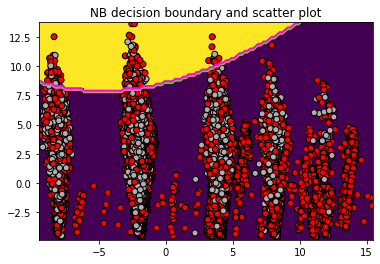

In [51]:
#Naive Bayes Classifier
def NB():
    gnb = GaussianNB()
    gnb.fit(principal_df, Y_df)

    
    cmap_light=ListedColormap(['#F08080','#00FF00','#FF00FF'])
    cmap_bold=ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    x_min, x_max = principalComponents_data[:, 0].min() - 0.2,principalComponents_data[:, 0].max() + 0.2
    y_min, y_max = principalComponents_data[:, 1].min() - 0.2, principalComponents_data[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),np.arange(y_min, y_max, 0.2))
    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure
    plt.pcolormesh(xx,yy,Z)
    plt.contour(xx, yy, Z,cmap=cmap_light)
    plt.title("NB decision boundary and scatter plot")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(principalComponents_data[:, 0],principalComponents_data[:, 1], c=Y_df,cmap=cmap_bold,edgecolor = 'black')
                        
    plt.show()
    
NB()

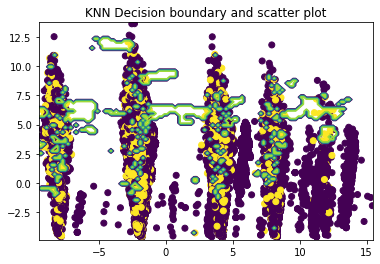

In [56]:
#KNN Classifier
def KNN():
    knn=KNeighborsClassifier(n_neighbors=10,weights='distance')
    knn.fit(principal_df,Y_df)

    
    cmap_light=ListedColormap(['#F08080','#00FF00','#FF00FF'])
    cmap_bold=ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    x_min, x_max = principalComponents_data[:, 0].min() - 0.2,principalComponents_data[:, 0].max() + 0.2
    y_min, y_max = principalComponents_data[:, 1].min() - 0.2, principalComponents_data[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),np.arange(y_min, y_max, 0.2))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contour(xx, yy, Z)
    plt.title("KNN Decision boundary and scatter plot")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(principalComponents_data[:, 0],principalComponents_data[:, 1], c=Y_df)
                        
    plt.show()
    
KNN()

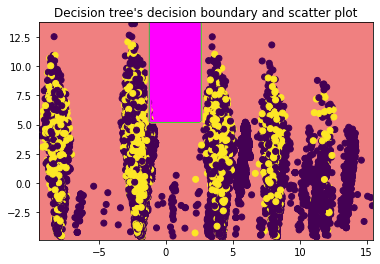

In [55]:
#Decision bounday Classifier
def DT():
    
    dt=DecisionTreeClassifier( criterion = "entropy", max_depth =6)
    dt.fit(principal_df,Y_df)

    
    cmap_light=ListedColormap(['#F08080','#00FF00','#FF00FF'])
    cmap_bold=ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    x_min, x_max = principalComponents_data[:, 0].min() - 0.2,principalComponents_data[:, 0].max() + 0.2
    y_min, y_max = principalComponents_data[:, 1].min() - 0.2, principalComponents_data[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),np.arange(y_min, y_max, 0.2))
    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    plt.contour(xx, yy, Z,cmap=cmap_light)
    plt.title("Decision tree's decision boundary and scatter plot")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(principalComponents_data[:, 0],principalComponents_data[:, 1], c=Y_df)
                        
    plt.show()
    
DT()